In [1]:
"""
Name: con_measures.ipynb
Authors: Stephan Meighen-Berger, Andrea Turcati
Checks the effect different measures have
"""
%load_ext autoreload
%autoreload 2

In [2]:
 # General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd

In [3]:
# Adding path to module
sys.path.append("../")

In [4]:
# picture path
PICS = '../pics/'

In [5]:
# Module imports
from contagion import Contagion, config
# Options
# General
config['general']['trace spread'] = True
# Population
config['population']['population size'] = 1000
config['population']['social circle pdf']["mean"] = 40
config['population']['social circle interactions pdf']["mean"] = 18
config["population"]['population class'] = 'HomogeneousPopulation'
# HomogeneousPopulation AccuratePopulation
# Infection
config['infection']['infected'] = 1
config['infection']['infection probability pdf']['mean'] = 1.
config['infection']['infection probability pdf']['sd'] = 0.2
config['infection']['infection probability pdf']['max_val'] = 0.5
config['infection']["latency duration pdf"]['mean'] = 2.
config['infection']["latency duration pdf"]['sd'] = 1.0
config['infection']["incubation duration pdf"]['mean'] = 3.
config['infection']["incubation duration pdf"]['sd'] = 0.01
config['infection']["infectious duration pdf"]['mean'] = 2.
config['infection']["infectious duration pdf"]['sd'] = 0.2
config['infection']["hospitalization probability pdf"]['mean'] = 0.5
config['infection']["hospitalization probability pdf"]['sd'] = 0.01
# Measures
config['measures']['type'] = 'contact_tracing'

In [6]:
# Creating a contagion object
fractions = [0.2, 0.5, 0.7]
results = []
for fraction in fractions:
    config["measures"]["tracked fraction"] = fraction
    contagion = Contagion()
    contagion.sim()
    stats = pd.DataFrame(contagion.statistics)
    results.append(stats['is_infected'])

In [7]:
# Plotting standards
std_size = 10.
fontsize = 15.
lw=3.
h_length=1.

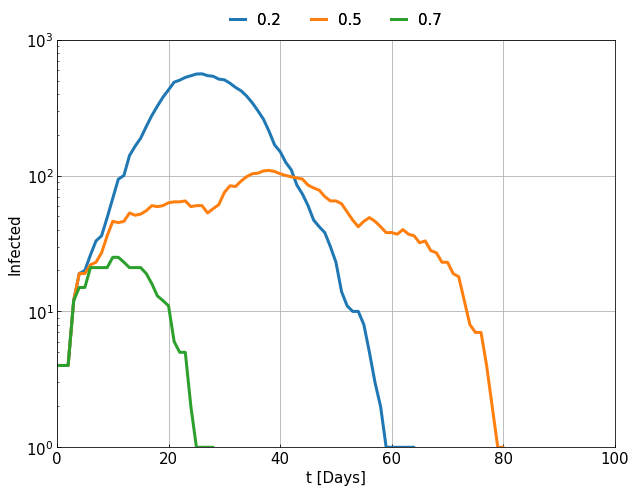

In [8]:
 # Infections per time step
figure, ax = plt.subplots(figsize=(std_size, std_size * 6. / 8.))
colors = ['#fdcc8a',
          '#fc8d59',
          '#d7301f']
for id_frac, fraction in enumerate(fractions):
    ax.plot(contagion.t, results[id_frac],
            lw=lw, label='%.1f' % fraction)
ax.set_xlim(0, 100)
ax.set_ylim(1., 1e3)
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_xlabel(r't [Days]', fontsize=fontsize)
ax.set_ylabel(r'Infected', fontsize=fontsize)
ax.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax.get_legend_handles_labels()
lgd1 = ax.legend(h,l, loc=9, bbox_to_anchor=(0.5, +1.1),
                 ncol=3, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax.add_artist(lgd1)
plt.grid(True)
plt.show()

In [9]:
figure.savefig(PICS + "Contagion_Measures.png",
               bbox_inches='tight')